# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [8]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=bluff
Processing Record 2 | Roald
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=roald
Processing Record 3 | Talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=talnakh
City not found. Skipping...
Processing Record 4 | Cockburn Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=cockburn town
Processing Record 5 | Denpasar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=denpasar
Processing Record 6 | Diego de Almagro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=diego de almagro
Processing Record 7 | Andijan
http://api.open

City not found. Skipping...
Processing Record 56 | Neuquén
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=neuquen
Processing Record 57 | Antofagasta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=antofagasta
Processing Record 58 | Hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=hobart
Processing Record 59 | Loandjili
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=loandjili
Processing Record 60 | Yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=yellowknife
Processing Record 61 | Uglovskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=uglovskoye
Processing Record 62 | Dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

Processing Record 112 | Formosa do Rio Preto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=formosa do rio preto
Processing Record 113 | Srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=srednekolymsk
Processing Record 114 | Rundu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=rundu
Processing Record 115 | Ust-Tsilma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=ust-tsilma
Processing Record 116 | Bima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=bima
Processing Record 117 | Vardø
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=vardo
Processing Record 118 | Majene
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd7

Processing Record 167 | Kangaatsiaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=kangaatsiaq
Processing Record 168 | Aklavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=aklavik
Processing Record 169 | Nha Trang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=nha trang
Processing Record 170 | Biak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=biak
Processing Record 171 | Port Moresby
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=port moresby
Processing Record 172 | Lodja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=lodja
Processing Record 173 | Kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed7

Processing Record 223 | Dalvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=dalvik
Processing Record 224 | Lázaro Cárdenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=lazaro cardenas
Processing Record 225 | Ranong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=ranong
Processing Record 226 | Namikupa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=namikupa
Processing Record 227 | Sioux Falls
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=sioux falls
Processing Record 228 | Chui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=chuy
Processing Record 229 | Narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2

Processing Record 278 | Bayir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=bayir
Processing Record 279 | Isangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=isangel
City not found. Skipping...
Processing Record 280 | Caucayá
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=puerto leguizamo
Processing Record 281 | Sachīn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=sachin
Processing Record 282 | Nabire
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=nabire
Processing Record 283 | Quryq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=kuryk
Processing Record 284 | São Filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd79

Processing Record 334 | Portland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=portland
Processing Record 335 | Gushikawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=gushikawa
Processing Record 336 | Port-Gentil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=port-gentil
Processing Record 337 | Malaya Vishera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=malaya vishera
Processing Record 338 | Tlaxco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=tlaxco
Processing Record 339 | Tilichiki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=tilichiki
Processing Record 340 | Safi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791

Processing Record 390 | Saint-Leu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=saint-leu
Processing Record 391 | Inza
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=inza
Processing Record 392 | Kropotkin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=kropotkin
Processing Record 393 | Bulnes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=bulnes
Processing Record 394 | Saint-Augustin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=saint-augustin
City not found. Skipping...
City not found. Skipping...
Processing Record 395 | Concordia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=concordia
Processing Record 396 | Arauca
http://api.openweathermap.org/data/2.

Processing Record 446 | Vyshestebliyevskaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=vyshestebliyevskaya
Processing Record 447 | Korla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=korla
Processing Record 448 | Yumen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=yumen
Processing Record 449 | Wrocław
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=wroclaw
Processing Record 450 | Pontianak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=pontianak
Processing Record 451 | Port Hueneme
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=port hueneme
Processing Record 452 | Pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd79

Processing Record 502 | Khovd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=hovd
Processing Record 503 | Ust'-Kan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=ust-kan
Processing Record 504 | Juba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=juba
Processing Record 505 | Nandurbar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=nandurbar
Processing Record 506 | Karratha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=karratha
Processing Record 507 | Aksarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=aksarka
Processing Record 508 | Concepción del Uruguay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79

City not found. Skipping...
Processing Record 559 | Nagorsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=nagorsk
Processing Record 560 | Buala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=buala
Processing Record 561 | Kaputa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=kaputa
City not found. Skipping...
Processing Record 562 | Salekhard
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=salekhard
Processing Record 563 | Esim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=axim
City not found. Skipping...
Processing Record 564 | Mankera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68cb0e93ffbd791ca65e3a9b7b2ed79c&q=mankera
Processing Record 565 | Krasnosel'kup
http://api.openweathermap.or

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          568
Cloudiness    568
Country       568
Date          568
Humidity      568
Lat           568
Lng           568
Max Temp      568
Wind Speed    568
dtype: int64

In [30]:
# Save data frame to CSV
weather_data.to_csv('../weather_data.csv', encoding='utf8',index=False)

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bluff,100,NZ,1583805411,97,-46.60,168.33,51.01,8.99
1,Roald,41,NO,1583805412,100,62.58,6.13,41.00,8.05
2,Talnakh,20,RU,1583805414,62,69.49,88.40,-14.80,8.95
3,Cockburn Town,60,TC,1583805415,73,21.46,-71.14,74.53,28.90
4,Denpasar,20,ID,1583805416,84,-8.65,115.22,86.00,6.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

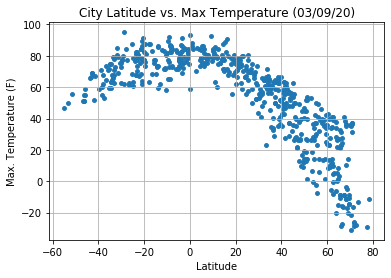

In [32]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=15)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (03/09/20)")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../Max_Temp_vs_Latitude.png")
plt.show()


#### Latitude vs. Humidity Plot

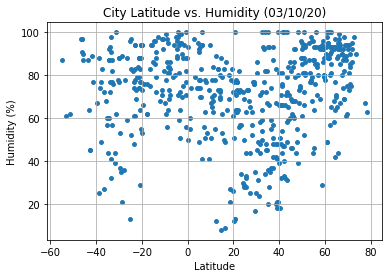

In [35]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=15)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (03/10/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../Humidity_vs_Latitude.png")
plt.show()



#### Latitude vs. Cloudiness Plot

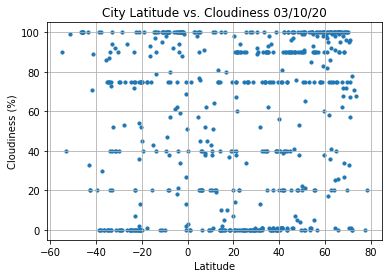

In [37]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness 03/10/20")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../Cloudiness_vs_Latitude.png")
plt.show()


#### Latitude vs. Wind Speed Plot

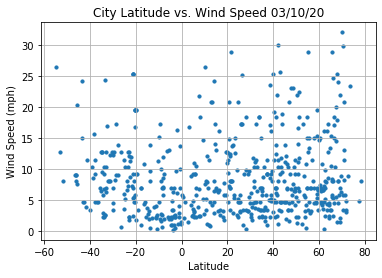

In [39]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed 03/10/20")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("../Wind_Speed_vs_Latitude.png")

plt.show()